In [2]:
import enum
import re
from functools import partial

import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from requests_html import HTMLSession, AsyncHTMLSession

In [3]:
class URL(enum.Enum):
    JD = "https://search.jd.com/Search?keyword={keyword}"
    AMAZON = "https://www.amazon.com/s?k={keyword}"    

In [4]:
def url_to_bs(url_base:URL, keyword: str) -> BeautifulSoup:
    url = url_base.value.format(keyword=keyword)
    session = HTMLSession()
    resp = session.get(url)
    return BeautifulSoup(resp.html.html, "html.parser")

# jd_search = partial(url_to_bs, URL.JD)


In [5]:
def jd_search(keyword: str) -> BeautifulSoup:
    url = f"https://search.jd.com/Search?keyword={keyword}"
    session = HTMLSession()
    resp = session.get(url)
    return BeautifulSoup(resp.html.html, "html.parser")


In [6]:
bs = jd_search("iphone")


In [7]:
products = bs.find_all("li", {"class": "gl-item"})

In [8]:
df = pd.DataFrame(({"name":p.find("div", {"class": "p-name"}).find("em").text, "price":p.find("div", {"class": "p-price"}).text.strip()} for p in products))
df

,name,price
0,【12期免息可选】Apple 苹果 iPhone 13（A2634）全网通5G手机 128G...,￥5698.00
1,Apple iPhone 13 (A2634) 128GB 星光色 支持移动联通电信5G 双...,￥5999.00
2,Apple iPhone 13 Pro Max (A2644) 256GB 远峰蓝色 支持移...,￥9799.00
3,Apple iPhone 12 (A2404) 256GB 白色 支持移动联通电信5G 双卡...,￥5699.00
4,京品手机\t\nApple iPhone 11 (A2223) 128GB 黑色 移动联通电...,￥4399.00
5,Apple iPhone 13 Pro (A2639) 256GB 石墨色 支持移动联通电信...,￥8799.00
6,Apple 苹果12 iPhone 12 5G手机（ 白条12期分期可选）下单尊享豪礼 绿色...,￥5199.00
7,Apple iPhone 13 (A2634) 128GB 星光色 支持移动联通电信5G 双...,￥5999.00
8,Apple iPhone 12 mini (A2400) 64GB 黑色 手机 支持移动联通...,￥3599.00
9,Apple iPhone 13 mini (A2629) 128GB 星光色 手机 支持移动...,￥5199.00


In [9]:

def find_code(name:str) -> str:
    "Find code of iPhone"
    try:
        return re.search(r"\bA\d+\b", name).group()
    except AttributeError:
        return np.NAN

def find_size(name:str) -> str:
    "Find size of iPhone"
    try:
        return re.search(r"\b\d+G\b", name).group()
    except AttributeError:
        return np.NAN



df["code"] = df.name.apply(find_code)
df["size"] = df.name.apply(find_size)
df["price"] = df.price.str.replace("￥", "").astype(float)
df

,name,price,code,size
0,【12期免息可选】Apple 苹果 iPhone 13（A2634）全网通5G手机 128G...,5698.0,A2634,128G
1,Apple iPhone 13 (A2634) 128GB 星光色 支持移动联通电信5G 双...,5999.0,A2634,NaN
2,Apple iPhone 13 Pro Max (A2644) 256GB 远峰蓝色 支持移...,9799.0,A2644,NaN
3,Apple iPhone 12 (A2404) 256GB 白色 支持移动联通电信5G 双卡...,5699.0,A2404,NaN
4,京品手机\t\nApple iPhone 11 (A2223) 128GB 黑色 移动联通电...,4399.0,A2223,NaN
5,Apple iPhone 13 Pro (A2639) 256GB 石墨色 支持移动联通电信...,8799.0,A2639,NaN
6,Apple 苹果12 iPhone 12 5G手机（ 白条12期分期可选）下单尊享豪礼 绿色...,5199.0,NaN,128G
7,Apple iPhone 13 (A2634) 128GB 星光色 支持移动联通电信5G 双...,5999.0,A2634,NaN
8,Apple iPhone 12 mini (A2400) 64GB 黑色 手机 支持移动联通...,3599.0,A2400,NaN
9,Apple iPhone 13 mini (A2629) 128GB 星光色 手机 支持移动...,5199.0,A2629,NaN


In [10]:
amazon_search = partial(url_to_bs, URL.AMAZON)

bs2 = amazon_search("iphone")

In [11]:
bs2.find_all("div", {"class": "sg-col-inner"})


[<div class="sg-col-inner">
 <div class="a-section a-spacing-small a-spacing-top-small">
 <span>1-16 of over 1,000 results for</span><span> </span><span class="a-color-state a-text-bold">"iphone"</span>
 </div>
 </div>,
 <div class="sg-col-inner">
 <div class="a-section a-spacing-small a-spacing-top-small a-text-right">
 <form action="/s" class="aok-inline-block a-spacing-none" method="get">
 <input name="k" type="hidden" value="iphone">
 <input name="qid" type="hidden" value="1646470202">
 <span class="a-dropdown-container"><label class="a-native-dropdown" for="s-result-sort-select">Sort by:</label><select autocomplete="off" class="a-native-dropdown a-declarative" data-action="a-dropdown-select" id="s-result-sort-select" name="s" tabindex="0">
 <option data-url="/s?k=iphone&amp;s=relevanceblender&amp;qid=1646470202&amp;ref=sr_st_relevanceblender" selected="" value="relevanceblender">Featured</option>
 <option data-url="/s?k=iphone&amp;s=price-asc-rank&amp;qid=1646470202&amp;ref=sr_st_

# Parsing of Legos

In [99]:
from urllib.parse import quote

import pandas as pd
from bs4 import BeautifulSoup
from requests_html import HTMLSession


def get_jd_url(keywords):
    """Return the URL for a JD search based on a keyword"""
    return f"https://search.jd.com/Search?keyword={quote(keywords)}"


def url_2_soup(url):
    """Get the BeautifulSoup object for a URL"""
    session = HTMLSession()
    resp = session.get(url)
    return BeautifulSoup(resp.html.html, "html.parser")


def get_df_jd(keywords):
    """Get a dataframe for the results of a JD search"""
    url = get_jd_url(keywords)
    soup = url_2_soup(url)
    products = soup.find_all("div", {"class": "gl-i-wrap"})
    data_products = [
        {
            "name": p.find("div", class_="p-name").text.strip(),
            "price": float(p.find("div", class_="p-price").find("i").text.strip()),
            "image": "http:" + p.find("div", class_="p-img").find("img").attrs["data-lazy-img"].strip(),
        }
        for p in products
    ]
    return pd.DataFrame(data_products)

get_df_jd("yoga mat")

,name,price,image
0,爱心东东\t\n‼lulu·lemon青色鸟瑜伽垫旗舰同款YOGAMAT瑜伽垫女专用初学者加...,109.0,http://img14.360buyimg.com/n7/jfs/t1/220359/31...
1,爱心东东\t\n‼lulu·lemon青色鸟瑜伽垫旗舰同款YOGAMAT瑜伽垫女专用初学者加...,101.0,http://img12.360buyimg.com/n7/jfs/t1/221802/39...
2,YOGAMAT瑜伽垫tpe男女初学者舞蹈加厚加宽加长防滑健身垫家用地垫 浅灰-黛蓝【61cm...,115.0,http://img11.360buyimg.com/n7/jfs/t1/158094/25...
3,YOGAMAT瑜伽垫tpe男女初学者舞蹈加厚加宽加长防滑健身垫家用地垫 单色蓝【61cm宽】...,105.0,http://img10.360buyimg.com/n7/jfs/t1/160487/1/...
4,爱心东东\nYOGAMAT瑜伽垫女tpe80CM加宽加厚健身垫初学者三件套毯 雾霾蓝+藏蓝【...,131.0,http://img13.360buyimg.com/n7/jfs/t1/146940/2/...
5,爱心东东\nYOGAMAT瑜伽垫女tpe80CM加宽加厚健身垫初学者三件套毯 皓月灰+爵士黑...,160.0,http://img12.360buyimg.com/n7/jfs/t1/120008/26...
6,tpe瑜伽垫80cm宽yogamat加宽加厚加长健身垫运动垫防滑垫沸鱼吾宜轩 香芋紫+暖灰(...,147.0,http://img10.360buyimg.com/n7/jfs/t1/157778/17...
7,YOGAMAT瑜伽垫tpe男女初学者舞蹈加厚加宽加长防滑健身垫家用地垫 抹茶绿+坚毅黑【61...,115.0,http://img10.360buyimg.com/n7/jfs/t1/168793/36...
8,瑜伽垫 天然橡胶瑜伽垫 5mm加厚防滑初学者 健身垫 带体位线YOGA MAT 淡墨灰-带体...,199.0,http://img10.360buyimg.com/n7/jfs/t1/182970/38...
9,瑜伽垫 天然橡胶瑜伽垫 5mm加厚防滑初学者 健身垫 带体位线YOGA MAT 熏烟紫-带体...,199.0,http://img13.360buyimg.com/n7/jfs/t1/194702/20...


In [107]:
import pandas as pd
from bs4 import BeautifulSoup
from urllib.parse import quote
from requests_html import HTMLSession

def get_amazon_url(keywords, domain="co.uk"):
    """Return the URL for an Amazon search based on a keyword"""
    return f"https://www.amazon.{domain}/s?k={quote(keywords)}"

def get_df_amazon(keywords, domain="co.uk"):
    """Get a dataframe for the results of a Amazon search"""
    url = get_amazon_url(keywords, domain=domain)
    soup = url_2_soup(url)
    products = soup.find("div", class_="s-matching-dir").find_all("div", class_="sg-col-inner")
    data_products = [

        {
            "name": p.find("h2").text.strip(),
            # We will have to transform "," to "." if we use prices from France or Germany
            "price": float(p.find("span", class_="a-price").find("span", class_="a-offscreen").text.replace(",", ".").strip().strip("£€")),
        }
        for p in products
        if p.find("h2") and p.find("span", class_="a-price")
    ]
    return pd.DataFrame(data_products)

df = get_df_amazon("yoga mat")
print(df.describe())
df

            price
count   69.000000
mean    26.040870
std     21.089997
min      5.990000
25%     17.590000
50%     20.000000
75%     26.970000
max    139.950000


,name,price
0,Yogii Yoga Mat - Premium TPE Pilates Mat - Eco...,17.59
1,COVACURE Yoga Mat Non Slip - Eco Friendly Exer...,17.59
2,Yoga Mat innhom Non Slip Yoga Mats for Women M...,24.89
3,Maximo Exercise Mat - Multi-Purpose 183cm x 60...,26.97
4,"Yoga Mat, 6mm TPE Non-Slip Yoga Mat for Workou...",21.97
...,...,...
64,"Liforme Original Yoga Mat – Free Yoga Bag, Pat...",104.95
65,"KAIZENLY Eco-Friendly Yoga Mat - Natural Cork,...",29.49
66,Liforme Travel Yoga mat – Patented Alignment S...,89.95
67,Amazon Brand – Umi - Pilates Mat Non Slip Yoga...,24.00


In [106]:
get_df_amazon("yoga mat", domain="de").describe()

,price
count,64.000000
mean,33.775938
std,18.697582
min,14.990000
25%,23.890000
50%,26.980000
75%,35.490000
max,109.990000


In [108]:
import pandas as pd
from bs4 import BeautifulSoup
from urllib.parse import quote
from requests_html import HTMLSession

def get_newegg_url(keywords):
    """Return the URL for an NewEgg search based on a keyword"""
    return f"https://www.newegg.com/p/pl?d={quote(keywords)}"


soup = url_2_soup(get_newegg_url("Yoga"))
print(soup.prettify()[:2000])

<!DOCTYPE html>
<html class="show-tab-store" lang="en-us">
 <head>
  <title>
   Yoga | Newegg.com
  </title>
  <meta charset="utf-8"/>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="always" name="referrer"/>
  <meta content="Yoga" name="keywords"/>
  <meta content="Search Newegg.com for Yoga. Get fast shipping and top-rated customer service." name="description"/>
  <meta content="https://c1.neweggimages.com/WebResource/Themes/Nest/logos/logo_newegg_400400.png" property="og:image"/>
  <meta content="Search Newegg.com for Yoga. Get fast shipping and top-rated customer service." property="og:description"/>
  <meta content="https://www.newegg.com/p/pl?d=yoga" property="og:url"/>
  <meta content="website" property="og:type"/>
  <meta content="Yoga | Newegg.com" property="og:title"/>
  <meta content="english" name="language"/>
  <meta content="© 2000-2022 Newegg Inc." name="copyright"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta 

In [40]:
products = soup.find_all("div", class_="item-container")
prod = products[0]

name = prod.find("a", class_="item-title").text.strip()
price = prod.find("li", class_="price-current").find("strong").text.strip()
print(
    f"""\
    Name: {name}
    Price: {price}
    """
)


    Name: Apple iPad 10.2" 64GB Wifi Silver 2021 9th Generation MK2L3LL/A
    Price: 401
    


In [110]:

def get_newegg_price(price_current):
    """Process the price of a result (string) and return the string"""
    import re
    return float(re.sub(r'.*?([\d\.]+).*', r'\1', price_current))

def get_df_newegg(keywords):
    """Get a dataframe for the results of a NewEgg search"""
    url = get_newegg_url(keywords)
    soup = url_2_soup(url)
    products = soup.find_all("div", class_="item-container")
    data_products = [

        {
            "name": p.find("a", class_="item-title").text.strip(),
            "price": get_newegg_price(p.find("li", class_="price-current").text),
        }
        for p in products
        if p.find("li", class_="price-current").text
    ]
    return pd.DataFrame(data_products)

df = get_df_newegg("yoga")
print(df.describe())
df

            price
count   43.000000
mean    88.287674
std    125.870110
min      1.000000
25%     40.000000
50%     58.000000
75%     73.500000
max    699.990000


,name,price
0,Lenovo Active Pen 2 for Yoga,58.99
1,Lenovo Tab P11 Pro Xiaoxin Pad Pro 11.5 inch W...,349.00
2,Lenovo Tablet PC P11 Xiaoxin Pad 11 Inch WiFi ...,259.00
3,BoxWave Lenovo Thinkpad X1 Yoga (3rd Gen) Styl...,55.70
4,Lenovo Active Pen 2 for Yoga,58.99
5,BoxWave Lenovo Thinkpad X1 Yoga (3rd Gen) Styl...,55.70
6,"Lenovo ThinkPad P14s Gen 2, Laptop, 14"" IPS FH...",1.00
7,"Lenovo Yoga Tab 11 + Pen Bundle, 11.0"" IPS Tou...",369.99
8,"Lenovo ThinkPad X1 Yoga Gen 4 14"" Touch 16GB 5...",1.00
9,"BoxWave Lenovo Yoga Tablet 2 10.1 Stylus Pen, ...",26.00


# Parsing Legos

In [92]:
from forex_python.converter import CurrencyRates

currency_rates = CurrencyRates()

EXCHANGE_RATES = {
    currency: currency_rates.get_rate(currency, 'CNY')
    for currency in ['USD', 'EUR', 'GBP']
}
EXCHANGE_RATES

{'USD': 6.319425382011163, 'EUR': 6.9065, 'GBP': 8.382895567315629}

In [98]:
LIST_LEGOS = {
    "Apollo Saturn V": 21309,
    "Safari Tree House": 31116,
    "NASA Women": 21312,
    "Jeep Wrangler": 42122,
    "HP Hogwarts": 71043,
    "City Town": 60097,
    "Millennium Falcon": 75257,
    "Frozen Ice Palace": 43172,
    "Classic Box": 10698,
    "Infinity Gauntlet": 76191 ,
}

In [112]:

def get_lego_df(lego_name, lego_id):
    """Get a DataFrame with information about the lego box from the different websites"""
    print(f"Searching Lego {lego_name} (id={lego_id})")
    try:
        df_jd = get_df_jd(f"lego {lego_id}")
        df_jd["source"] = "JD"
    except Exception as e:
        print(f"Error getting Lego {lego_id} ({lego_name}) from JD: {e}")
        df_jd = pd.DataFrame()

    try:
        df_amazon = get_df_amazon(f"lego {lego_id}")
        df_amazon["price"] = df_amazon["price"] * EXCHANGE_RATES["GBP"]
        df_amazon["source"] = "Amazon UK"
    except Exception as e:
        print(f"Error getting Lego {lego_id} ({lego_name}) from Amazon UK: {e}")
        df_amazon = pd.DataFrame()

    try:
        df_amazon_de = get_df_amazon(f"lego {lego_id}", domain="de")
        df_amazon_de["price"] = df_amazon["price"] * EXCHANGE_RATES["EUR"]
        df_amazon_de["source"] = "Amazon DE"
    except Exception as e:
        print(f"Error getting Lego {lego_id} ({lego_name}) from Amazon DE: {e}")
        df_amazon_de = pd.DataFrame()

    try:
        df_newegg = get_df_newegg(f"lego {lego_id}")
        df_newegg["price"] = df_newegg["price"] * EXCHANGE_RATES["USD"]
        df_newegg["source"] = "NewEgg US"
    except Exception as e:
        print(f"Error getting Lego {lego_id} ({lego_name}) from NewEgg US: {e}")
        df_newegg = pd.DataFrame()

    df = pd.concat([df_jd, df_amazon, df_amazon_de, df_newegg], ignore_index=True)
    df = df[df.name.str.contains(str(lego_id))]
    df["legoID"] = lego_id
    df["legoName"] = lego_name

    return df

df_lego = pd.concat([get_lego_df(name, i) for name, i in LIST_LEGOS.items()], ignore_index=True)
df_lego

Searching Lego Apollo Saturn V (id=21309)
Searching Lego Safari Tree House (id=31116)
Searching Lego NASA Women (id=21312)
Searching Lego Jeep Wrangler (id=42122)
Searching Lego HP Hogwarts (id=71043)
Searching Lego City Town (id=60097)
Searching Lego Millennium Falcon (id=75257)
Searching Lego Frozen Ice Palace (id=43172)
Searching Lego Classic Box (id=10698)
Searching Lego Infinity Gauntlet (id=76191)


,name,price,image,source,legoID,legoName
0,【乐高官方认证店】乐高（LEGO）IDEAS阿波罗土星火箭拼装积木玩具开学季 阿波罗土星五号...,1099.000000,http://img10.360buyimg.com/n7/jfs/t30418/15/32...,JD,21309,Apollo Saturn V
1,【乐高官方认证店】乐高（LEGO）积木玩具 Ideas系列开学季 21309 阿波罗土星五号,1099.000000,http://img11.360buyimg.com/n7/jfs/t5842/55/677...,JD,21309,Apollo Saturn V
2,LEGO 21309 - IDEAS - APOLLO 11,354.344996,NaN,Amazon UK,21309,Apollo Saturn V
3,Tewerfitisme Technology Rocket Launcher Model ...,354.344996,NaN,Amazon UK,21309,Apollo Saturn V
4,Launch Platform for Lego NASA Apollo Saturn V ...,184.256045,NaN,Amazon UK,21309,Apollo Saturn V
...,...,...,...,...,...,...
158,cooldac LED-Licht Kit für Lego 76191 Marvel Su...,NaN,NaN,Amazon DE,76191,Infinity Gauntlet
159,BRIKSMAX Led Beleuchtungsset für Lego Marvel I...,NaN,NaN,Amazon DE,76191,Infinity Gauntlet
160,"Led Licht Set für Lego Infinity Handschuh,Deko...",NaN,NaN,Amazon DE,76191,Infinity Gauntlet
161,LEGO 76193 Marvel Super Heroes Das Schiff der ...,NaN,NaN,Amazon DE,76191,Infinity Gauntlet


In [113]:
df_average = df_lego.groupby(["source", "legoName"]).mean().reset_index()
df_average

,source,legoName,price,legoID
0,Amazon DE,Apollo Saturn V,7980.593923,21309.0
1,Amazon DE,City Town,1390.673167,60097.0
2,Amazon DE,Frozen Ice Palace,4012.804213,43172.0
3,Amazon DE,HP Hogwarts,6627.505213,71043.0
4,Amazon DE,Infinity Gauntlet,3068.828615,76191.0
5,Amazon DE,Jeep Wrangler,2869.555739,42122.0
6,Amazon DE,Millennium Falcon,2199.602621,75257.0
7,Amazon DE,Safari Tree House,740.495829,31116.0
8,Amazon UK,Apollo Saturn V,468.212660,21309.0
9,Amazon UK,City Town,303.879964,60097.0


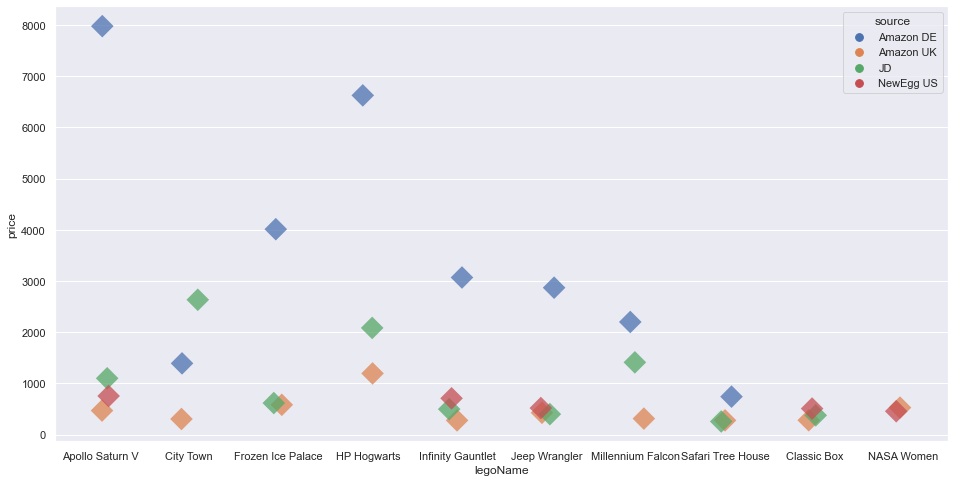

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid", rc={"figure.figsize": (16, 8)})
ax = sns.stripplot(x="legoName", y="price", hue="source", data=df_average, size=16, marker="D", alpha=.75)
# plt.show(ax)

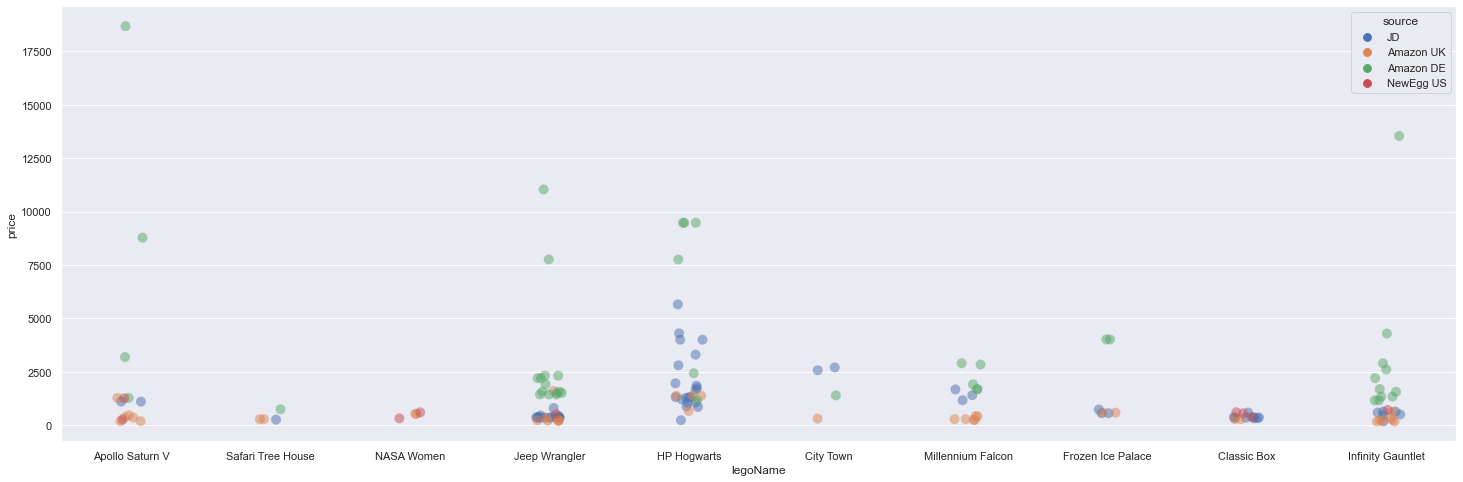

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid", rc={"figure.figsize": (25, 8)})
ax = sns.stripplot(x="legoName", y="price", hue="source", data=df_lego, alpha=.50, size=10)
# plt.show()

In [119]:
soup = url_2_soup(get_amazon_url("yoga mat"))
# soup.find("div", class_="sg-col-inner").prettify()

soup.find("div", class_="s-matching-dir").find_all("div", class_="sg-col-inner")[0].prettify()

AttributeError: 'NoneType' object has no attribute 'find_all'